# Puntos fijos

En la práctica 1 vimos el siguiente modelo de un sistema de reacciones químicas:
\begin{align}
\frac{dx}{dt} &= a - (b+1) x + x^2 y, \\
\frac{dy}{dt} &= b\,x - x^2 y,
\end{align}

Tenemos un "punto fijo" o punto de equilibrio si se cumple que todas las derivadas temporales se anulan: $x$ e $y$ no evolucionan.

Tenemos que resolver las ecuaciones:
\begin{align}
a - (b+1) x + x^2 y& = 0, \\
b\,x - x^2 y& = 0,
\end{align}
para encontrarlos.

Se puede ver que: $(x,y)=(a, b/a)$  es solución.

Veamos cómo es el comportamiento cerca del punto fijo. Esto es, si partimos de valores de $x$ e $y$ muy cerca del mismo:
\begin{align}
x\to a+\delta x\\
y\to \frac{b}{a}+\delta y
\end{align}
con $\delta x \to 0$ y $ \delta y\to 0$.

Reemplazando en las ODE y quedándonos con términos a primer orden en $\delta x$ y $\delta y$:
\begin{align}
\frac{d\delta x}{dt} &=  (b-1) \delta x + a^2 \delta y, \\
\frac{d\delta y}{dt} &= -b\,\delta x - a^2 \delta y,
\end{align}
o matricialmente:

\begin{align}
\frac{d}{dt}\begin{pmatrix} \delta x\\\delta y
\end{pmatrix}=
\begin{pmatrix}
b-1& a^2\\
-b& -a^2
\end{pmatrix}
\begin{pmatrix} \delta x\\\delta y
\end{pmatrix}
\end{align}

Por lo que nos queda un sistema *lineal* y homogéneo ecuaciones diferenciales ordinarias, que tiene como solución:
$$
\begin{pmatrix} \delta x(t)\\\delta y(t)
\end{pmatrix} = e^{\begin{pmatrix}
b-1& a^2\\
-b& -a^2
\end{pmatrix}t}
\begin{pmatrix} \delta x(0)\\\delta y(0)
\end{pmatrix}
$$

Para conocer la estabilidad del punto fijo nos alcanza con conocer los autovalores de la matriz. Si la parte real de todos los autovalores es negativa, el punto fijo es estable. Si alguna parte real es positiva, el punto fijo es inestable.

Para el caso $a=1$ y $b=1$ nos queda la matriz:

$$
\begin{pmatrix} 0 & 1 \\ -1 & -1 \end{pmatrix}$$
con autovalores:
- $\lambda_1 = \frac{1}{2} (-1 + i\sqrt{3})$
-  $\lambda_2 = \frac{1}{2} (-1 - i\sqrt{3})$

por lo que el punto fijo es estable.

Para el caso $a=1$ y $b=3$ nos queda la matriz:

$$
\begin{pmatrix} 2 & 1 \\ -3 & -1 \end{pmatrix}$$
con autovalores:
- $\lambda_1 = \frac{1}{2} (1 + i\sqrt{3})$
-  $\lambda_2 = \frac{1}{2} (1 - i\sqrt{3})$

por lo que el punto fijo es inestable.




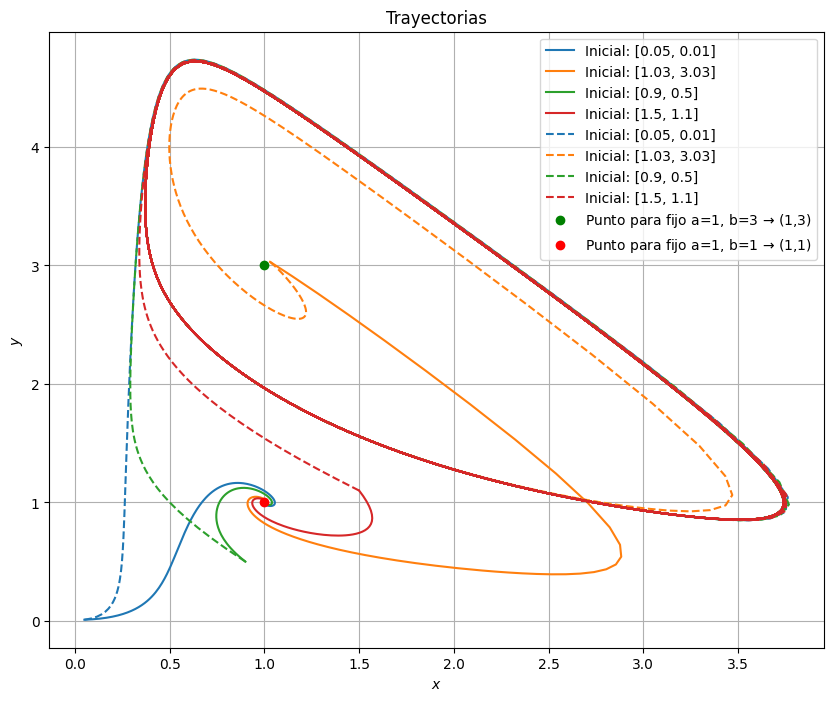

In [ ]:
# @title
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Sistema de EDO

def EDOs(Y,t, a, b):
    x, y = Y
    dxdt = a- (b+1)* x + x**2 * y
    dydt = b * x - x**2 *y
    return [dxdt, dydt]

def EDO11(Y, t):
    a = 1
    b = 1
    return EDOs(Y,t,a,b)

def EDO13(Y, t):
    a = 1
    b = 3
    return EDOs(Y,t,a,b)

# Tiempos
t = np.linspace(0, 100, 2000)

# Varias condiciones iniciales
cond_inic = [
    [0.05, 0.01],
    [1.03, 3.03],
    [0.9, 0.5],
    [1.5, 1.1]
]

plt.figure(figsize=(10, 8))
for init_cond in cond_inic:
    sol = odeint(EDO11, init_cond, t)
    plt.plot(sol[:, 0], sol[:, 1], label=f'Inicial: {init_cond}')

plt.gca().set_prop_cycle(None)

for init_cond in cond_inic:
    sol = odeint(EDO13, init_cond, t)
    plt.plot(sol[:, 0], sol[:, 1], '--', label=f'Inicial: {init_cond}')


# Puntos fijos
plt.plot(1, 3, 'go', label='Punto para fijo a=1, b=3 $\\to$ (1,3)')
plt.plot(1, 1, 'ro', label='Punto para fijo a=1, b=1 $\\to$ (1,1)')

plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend()
plt.title('Trayectorias')
plt.grid(True)
plt.show()


## Análisis de la estabilidad de puntos fijos

Dado un conjunto de ecuaciones diferenciales ordinarias no lineales,

$$ \frac{{dx_i}}{{dt}} = f_i(x_1, x_2, \ldots, x_n) $$

donde $i = 1, 2, \ldots, n$, necesitamos encontrar los valores de $x_i$ que hacen cero el lado derecho para todo $i$.

### Identificamos los Puntos Fijos

Un punto fijo, también conocido como un punto de equilibrio, es un punto en el sistema donde las derivadas son cero. Para encontrar los puntos fijos, debemos resolver las ecuaciones:

$$ f_i(x_1, x_2, \ldots, x_n) = 0 $$

para todo $i$.

### Linearizamos el Sistema

Alrededor de cada punto fijo, linearizamos el sistema calculando la matriz Jacobiana $J$ de derivadas parciales:


$$ J_{ij} = \frac{{\partial f_i}}{{\partial x_j}} $$

Evaluamos la matriz Jacobiana en el punto fijo para obtener el sistema linearizado:

$$ \frac{{d\vec{\delta x}}}{{dt}} = J \vec{\delta x} $$

donde $\vec{\delta x}$ representa a las desviaciones respecto punto fijo.

- Verificar que con este procedimiento se llega a la misma matriz que en el ejemplo de más arriba.

###Analizamos la Estabilidad

La naturaleza del punto fijo (por ejemplo, estable, inestable o punto silla) se puede determinar examinando los autovalores de la matriz Jacobiana en el punto fijo.

- Si todos los valores propios tienen partes reales negativas, el punto fijo es estable.
- Si al menos un valor propio tiene una parte real positiva, el punto fijo es inestable.
- Si hay partes reales positivas y negativas, el punto fijo es un punto silla.


Hay que tener en cuenta que la linearización es una aproximación local, y los resultados pueden no capturar completamente el comportamiento global del sistema. Puede ser necesario un análisis adicional para entender cómo los términos no lineales influyen en la dinámica del sistema lejos de los puntos fijos.

